In [1]:
#Arabic NEWS classification data
#https://www.kaggle.com/code/khalilalla/textmining-project

In [2]:
#location file => C:\Users\HP\Desktop\Backupdossier\Master Recherche(M1) SDIA\S3\NLP\للغة العربية NLP - Arabic Natural Language Processing\TP\Text_Classification\arabic_dataset_classifiction.csv

# Import Libraries

In [72]:
import os
import random
import pandas as pd
import numpy as np

import re
import string

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem.isri import ISRIStemmer

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import rcParams

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from joblib import dump, load

from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Input

In [4]:
df = pd.read_csv("./arabic_dataset_classifiction.csv/arabic_dataset_classifiction.csv")

In [5]:
df

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0
...,...,...
111723,اللاعب تأخر في العودة إلى التداريب والمدرب غاض...,4
111724,المشرف العام لحسنية أكادير قال إنه سيغادر الفر...,4
111725,نسب إليه نتائج الوداد وصحوة الرجاء وآخر صيحاته...,4
111726,ستحتضن الرباط في الفترة مابين يوليوز المقبل دو...,4


# Data Cleaning

In [6]:
print(np.sum(df.isnull().any(axis=1)))

2939


In [7]:
clean_df = df.dropna()

In [8]:
print(np.sum(clean_df.isnull().any(axis=1)))

0


In [9]:
print(df.isnull().any(axis=0))

text      True
targe    False
dtype: bool


In [10]:
print(clean_df.isnull().any(axis=0))

text     False
targe    False
dtype: bool


In [11]:
clean_df

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0
...,...,...
111723,اللاعب تأخر في العودة إلى التداريب والمدرب غاض...,4
111724,المشرف العام لحسنية أكادير قال إنه سيغادر الفر...,4
111725,نسب إليه نتائج الوداد وصحوة الرجاء وآخر صيحاته...,4
111726,ستحتضن الرباط في الفترة مابين يوليوز المقبل دو...,4


In [12]:
clean_df.iloc[0]

text     بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...
targe                                                    0
Name: 0, dtype: object

In [13]:
clean_df.iloc[0,0]

'بين أستوديوهات ورزازات وصحراء مرزوكة وآثار وليلي ثم الرباط والبيضاء انتهى المخرج المغربي سهيل بن بركة من تصوير مشاهد عمله السينمائي الجديد الذي خصصه لتسليط الضوء عن حياة الجاسوس الإسباني دومينغو باديا الذي عاش فترة من القرن التاسع عشر بالمغرب باسم علي باي هذا الفيلم الذي اختار له مخرجه عنوان حلم خليفة يصور حياة علي باي العباسي الذي ما زال أحد أحياء طنجة يحمل اسمه عاش حياة فريدة متنكرا بشخصية تاجر عربي من سلالة الرسول صلى الله عليه وسلم فيما كان يعمل جاسوسا لحساب إسبانيا وكشف مخرج الفيلم سهيل بن بركة في تصريح لهسبريس أن الفيلم السينمائي دخل مرحلة التوضيب التي تتم خارج المغرب مبرزا أن الفيلم الذي يروي حياة الجاسوس الإسباني دومينغو باديا منذ أن قرر من طنجة بدء رحلاته نحو عدد من المناطق في العالم الإسلامي بداية القرن العشرين سيكون جاهزا بعد شهرين ويجمع الفيلم السينمائي عددا من الممثلين من مختلف الجنسيات واختار لدور البطولة الممثلة السينمائية الإيطالية كارولينا كريشنتيني للقيام بدور الإنجليزية الليدي هستر ستانهوب التي اشتهرت في الكتب الغربية بـ زنوبيا والتي عاشت بدورها بالدول العربية وارتب

In [14]:
clean_df.iloc[40,0]

'أخبارنا المغربية حنان سلامة ذكرت مصادر تونسية أن مصالح الامن التونسي اعتقلت مغني الراي الجزائري رضا الطالياني الأحد بمدينة الحمامات السياحية بعد عملية مداهمة مفاجئة وأضاف ذات المصدر أن عملية التوقيف تمت من قبل فرقة أمن الملاهي التابعة لوحدات التدخل بالحمامات حيث عثر بحوزته على مادة الكوكايين وبعد استشارة النيابة العمومية تم إيداع المغني رضا الطالياني الحبس المؤقت على ذمة التحقيق للإشارة فإن الطالياني كان من المنتظر أن يحي اليوم الإثنين حفلا فنيا بالعاصمة الرباط لكن تم إلغاؤه بسبب الاعتقال المفاجئ'

In [15]:
clean_df

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0
...,...,...
111723,اللاعب تأخر في العودة إلى التداريب والمدرب غاض...,4
111724,المشرف العام لحسنية أكادير قال إنه سيغادر الفر...,4
111725,نسب إليه نتائج الوداد وصحوة الرجاء وآخر صيحاته...,4
111726,ستحتضن الرباط في الفترة مابين يوليوز المقبل دو...,4


In [16]:
for letter in r'#.][!XR':
    clean_df['text'] = clean_df['text'].astype(str).str.replace(letter,'',regex=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1328\3738301946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text'] = clean_df['text'].astype(str).str.replace(letter,'',regex=True)


In [17]:
mystr = "Most"
xx = mystr.maketrans('M','H','o')
newstr = mystr.translate(xx)

print(newstr)

Hst


In [18]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuation = string.punctuation
punctuation_list = arabic_punctuations + english_punctuation

print("punctuation_list", punctuation_list)

punctuation_list `÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
def remove_punctuations(text):
    translator = str.maketrans('','',punctuation_list)
    return text.translate(translator)

In [20]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [21]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا",text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [22]:
stemmer = ISRIStemmer()

In [23]:
def processDocument(doc, stemmer):
    doc = remove_punctuations(doc)
    
    #replace some re
    doc = re.sub(r'@[^\s]+', ' ', doc)
    doc = re.sub(r'_', ' ', doc)
    doc = re.sub(r'\n', ' ', doc)
    doc = re.sub(r'[a-z,A-Z]', '', doc)
    doc = re.sub(r'\d', '', doc)
    doc = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',doc)
    
    doc = normalize_arabic(doc)
    
    doc = remove_repeating_char(doc)
    
    doc = stemmer.stem(doc)
    
    return doc

In [24]:
clean_df

,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0
...,...,...
111723,اللاعب تأخر في العودة إلى التداريب والمدرب غاض...,4
111724,المشرف العام لحسنية أكادير قال إنه سيغادر الفر...,4
111725,نسب إليه نتائج الوداد وصحوة الرجاء وآخر صيحاته...,4
111726,ستحتضن الرباط في الفترة مابين يوليوز المقبل دو...,4


In [25]:
clean_df['text'] = clean_df['text'].apply(lambda x:processDocument(x,stemmer))

C:\Users\HP\AppData\Local\Temp\ipykernel_1328\3553918876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text'] = clean_df['text'].apply(lambda x:processDocument(x,stemmer))


In [26]:
clean_df

,text,targe
0,بين استوديوهات ورزازات وصحراء مرزوكه واثار ولي...,0
1,قرت النجمه الامريكيه اوبرا وينفري الا يقتصر عم...,0
2,اخبارنا المغربيه الوزاني تصوير الشملالي الهب ا...,0
3,اخبارنا المغربيه قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعه الجلود في المغرب تبع الطريقه التقلي...,0
...,...,...
111723,اعب تاخر في العوده الي التداريب والمدرب غاضب و...,4
111724,مشرف العام لحسنيه اكادير قال انه سيغادر الفريق...,4
111725,نسب اليه نتائج الوداد وصحوه الرجاء واخر صيحاته...,4
111726,ستحتضن الرباط في الفتره مابين يوليوز المقبل دو...,4


# Text Tokenization

In [28]:
print(clean_df['text'].values[0])

بين استوديوهات ورزازات وصحراء مرزوكه واثار وليلي ثم الرباط والبيضاء انتهي المخرج المغربي سهيل بن بركه من تصوير مشاهد عمله السينمائي الجديد الذي خصه لتسليط الضوء عن حياه الجاسوس الاسباني دومينغو باديا الذي عاش فتره من القرن التاسع عشر بالمغرب باسم علي باي هذا الفيلم الذي اختار له مخرجه عنوان حلم خليفه يصور حياه علي باي العباسي الذي ما زال احد احياء طنجه يحمل اسمه عاش حياه فريده متنكرا بشخصيه تاجر عربي من سلاله الرسول صلي اله عليه وسلم فيما كان يعمل جاسوسا لحساب اسبانيا وكشف مخرج الفيلم سهيل بن بركه في تصريح لهسبريس ان الفيلم السينمائي دخل مرحله التوضيب التي تم خارج المغرب مبرزا ان الفيلم الذي يروي حياه الجاسوس الاسباني دومينغو باديا منذ ان قر من طنجه بدء رحلاته نحو عد من المناطق في العالم الاسلامي بدايه القرن العشرين سيكون جاهزا بعد شهرين ويجمع الفيلم السينمائي عدا من المثلين من مختلف الجنسيات واختار لدور البطوله المثله السينمائيه الايطاليه كارولينا كريشنتيني لقيام بدور الانجليزيه اليدي هستر ستانهوب التي اشتهرت في الكتب الغربيه ب زنوبيا والتي عاشت بدورها بالدول العربيه وارتبطت بعلي باي 

In [29]:
tokenizer = RegexpTokenizer(r'\w+')
clean_df['text'] = clean_df['text'].apply(tokenizer.tokenize)

C:\Users\HP\AppData\Local\Temp\ipykernel_1328\1726797722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text'] = clean_df['text'].apply(tokenizer.tokenize)


In [32]:
print(clean_df['text'].values[0])

['بين', 'استوديوهات', 'ورزازات', 'وصحراء', 'مرزوكه', 'واثار', 'وليلي', 'ثم', 'الرباط', 'والبيضاء', 'انتهي', 'المخرج', 'المغربي', 'سهيل', 'بن', 'بركه', 'من', 'تصوير', 'مشاهد', 'عمله', 'السينمائي', 'الجديد', 'الذي', 'خصه', 'لتسليط', 'الضوء', 'عن', 'حياه', 'الجاسوس', 'الاسباني', 'دومينغو', 'باديا', 'الذي', 'عاش', 'فتره', 'من', 'القرن', 'التاسع', 'عشر', 'بالمغرب', 'باسم', 'علي', 'باي', 'هذا', 'الفيلم', 'الذي', 'اختار', 'له', 'مخرجه', 'عنوان', 'حلم', 'خليفه', 'يصور', 'حياه', 'علي', 'باي', 'العباسي', 'الذي', 'ما', 'زال', 'احد', 'احياء', 'طنجه', 'يحمل', 'اسمه', 'عاش', 'حياه', 'فريده', 'متنكرا', 'بشخصيه', 'تاجر', 'عربي', 'من', 'سلاله', 'الرسول', 'صلي', 'اله', 'عليه', 'وسلم', 'فيما', 'كان', 'يعمل', 'جاسوسا', 'لحساب', 'اسبانيا', 'وكشف', 'مخرج', 'الفيلم', 'سهيل', 'بن', 'بركه', 'في', 'تصريح', 'لهسبريس', 'ان', 'الفيلم', 'السينمائي', 'دخل', 'مرحله', 'التوضيب', 'التي', 'تم', 'خارج', 'المغرب', 'مبرزا', 'ان', 'الفيلم', 'الذي', 'يروي', 'حياه', 'الجاسوس', 'الاسباني', 'دومينغو', 'باديا', 'منذ', 'ان', 'قر'

In [33]:
clean_df

,text,targe
0,"[بين, استوديوهات, ورزازات, وصحراء, مرزوكه, واث...",0
1,"[قرت, النجمه, الامريكيه, اوبرا, وينفري, الا, ي...",0
2,"[اخبارنا, المغربيه, الوزاني, تصوير, الشملالي, ...",0
3,"[اخبارنا, المغربيه, قال, ابراهيم, الراشدي, محا...",0
4,"[تزال, صناعه, الجلود, في, المغرب, تبع, الطريقه...",0
...,...,...
111723,"[اعب, تاخر, في, العوده, الي, التداريب, والمدرب...",4
111724,"[مشرف, العام, لحسنيه, اكادير, قال, انه, سيغادر...",4
111725,"[نسب, اليه, نتائج, الوداد, وصحوه, الرجاء, واخر...",4
111726,"[ستحتضن, الرباط, في, الفتره, مابين, يوليوز, ال...",4


In [36]:
stopwords_list = stopwords.words("arabic")

clean_df['text'] = clean_df['text'].apply(lambda x:[item for item in x if item not in stopwords_list])

C:\Users\HP\AppData\Local\Temp\ipykernel_1328\2503662618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text'] = clean_df['text'].apply(lambda x:[item for item in x if item not in stopwords_list])


In [37]:
'''
clean_row_text = [item for item in x if item not in stopwords_list]

clean_row_text = []

for item in x:
    if item not in stopwords_list:
        clean_row_text.append(item)
'''

'\nclean_row_text = [item for item in x if item not in stopwords_list]\n\nclean_row_text = []\n\nfor item in x:\n    if item not in stopwords_list:\n        clean_row_text.append(item)\n'

In [38]:
clean_df

,text,targe
0,"[استوديوهات, ورزازات, وصحراء, مرزوكه, واثار, و...",0
1,"[قرت, النجمه, الامريكيه, اوبرا, وينفري, الا, ي...",0
2,"[اخبارنا, المغربيه, الوزاني, تصوير, الشملالي, ...",0
3,"[اخبارنا, المغربيه, قال, ابراهيم, الراشدي, محا...",0
4,"[تزال, صناعه, الجلود, المغرب, تبع, الطريقه, ال...",0
...,...,...
111723,"[اعب, تاخر, العوده, الي, التداريب, والمدرب, غا...",4
111724,"[مشرف, العام, لحسنيه, اكادير, قال, انه, سيغادر...",4
111725,"[نسب, اليه, نتائج, الوداد, وصحوه, الرجاء, واخر...",4
111726,"[ستحتضن, الرباط, الفتره, مابين, يوليوز, المقبل...",4


# Data Analysis

In [42]:
def countProperties(df):
    all_words = []
    
    for rows in df['text']:
        for word in rows:
            all_words.append(word)
            
    sentence_lengths = []
    for rows in df['text']:
        sentence_lengths.append(len(rows))
        
    vocab = sorted(list(set(all_words)))
    
    print("total number of words in all data", len(all_words))
    print("total number of vocab in all data", len(vocab))
    print("max sentence length", max(sentence_lengths))
    
    return all_words

In [43]:
culture_df = clean_df.loc[clean_df['targe'] == 0]
diverse_df = clean_df.loc[clean_df['targe'] == 1]
economy_df = clean_df.loc[clean_df['targe'] == 2]
political_df = clean_df.loc[clean_df['targe'] == 3]
sport_df = clean_df.loc[clean_df['targe'] == 4]

In [45]:
print("culture_df")
culture_words = countProperties(culture_df)
print("diverse_df")
diverse_words = countProperties(diverse_df)
print("economy_df")
economy_words = countProperties(economy_df)
print("political_df")
political_words = countProperties(political_df)
print("sport_df")
sport_words = countProperties(sport_df)

culture_df
total number of words in all data 3169744
total number of vocab in all data 171270
max sentence length 3746
diverse_df
total number of words in all data 3849513
total number of vocab in all data 127086
max sentence length 1481
economy_df
total number of words in all data 3096116
total number of vocab in all data 110687
max sentence length 2703
political_df
total number of words in all data 4936991
total number of vocab in all data 164912
max sentence length 3980
sport_df
total number of words in all data 8893786
total number of vocab in all data 181324
max sentence length 2060


In [50]:
def plot(all_words,title):
    counted_words = Counter(all_words)
    
    words = []
    counts = []
    
    for unq_word, count in counted_words.most_common(25):
        words.append(unq_word)
        counts.append(count)
        
    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10
    
    plt.title(title)
    plt.xlabel("count")
    plt.ylabel("Unq_Words")
    plt.barh(words,counts,color = colors)

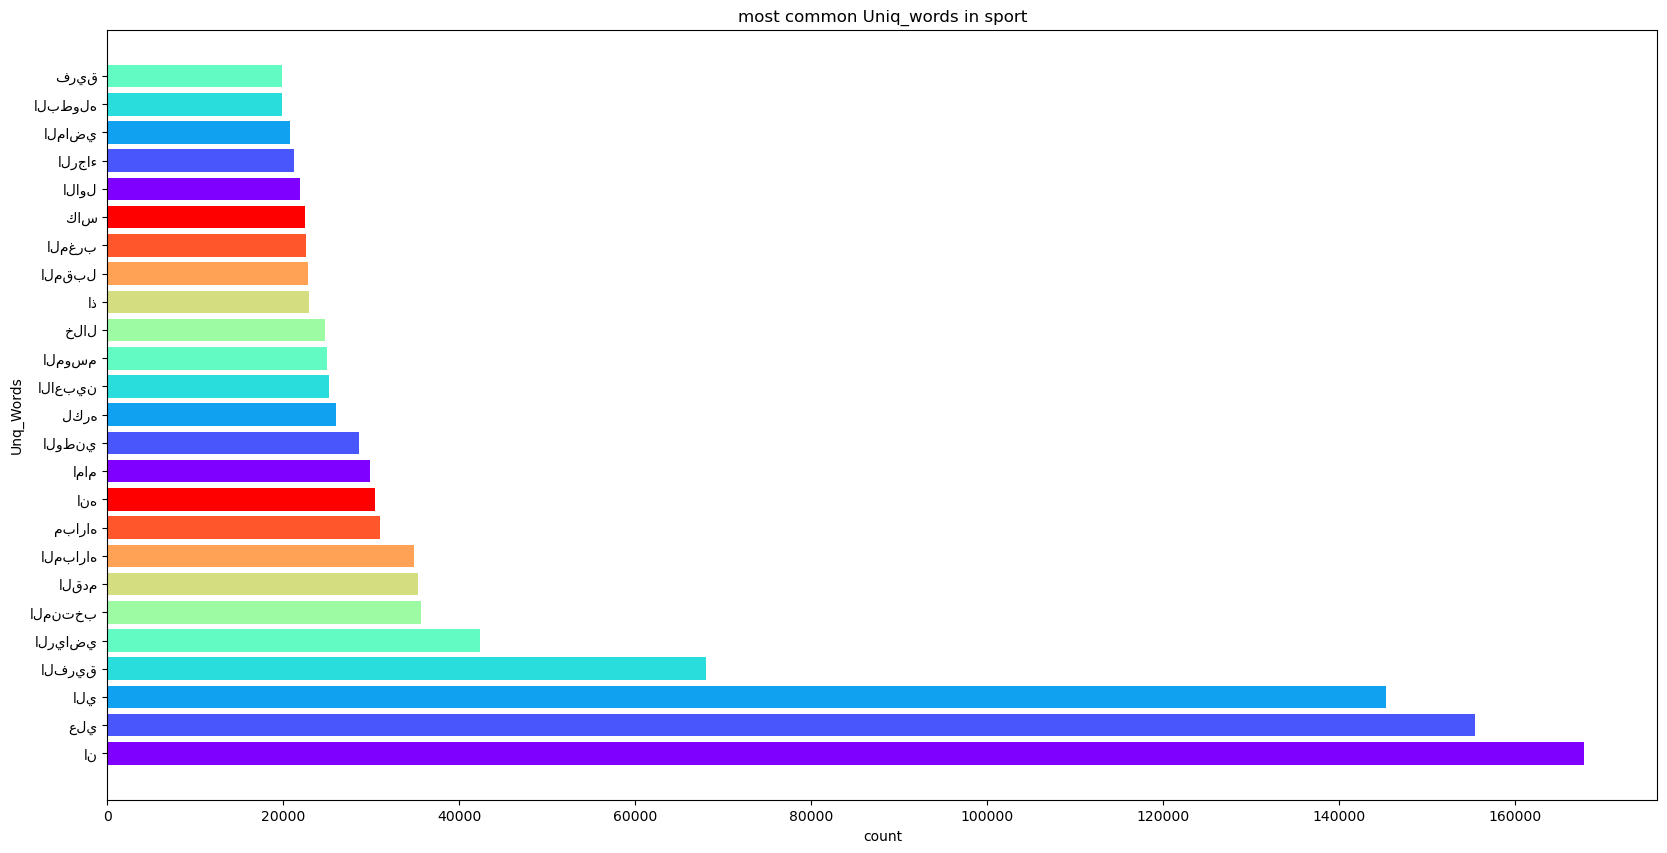

In [51]:
plot(sport_words, "most common Uniq_words in sport")

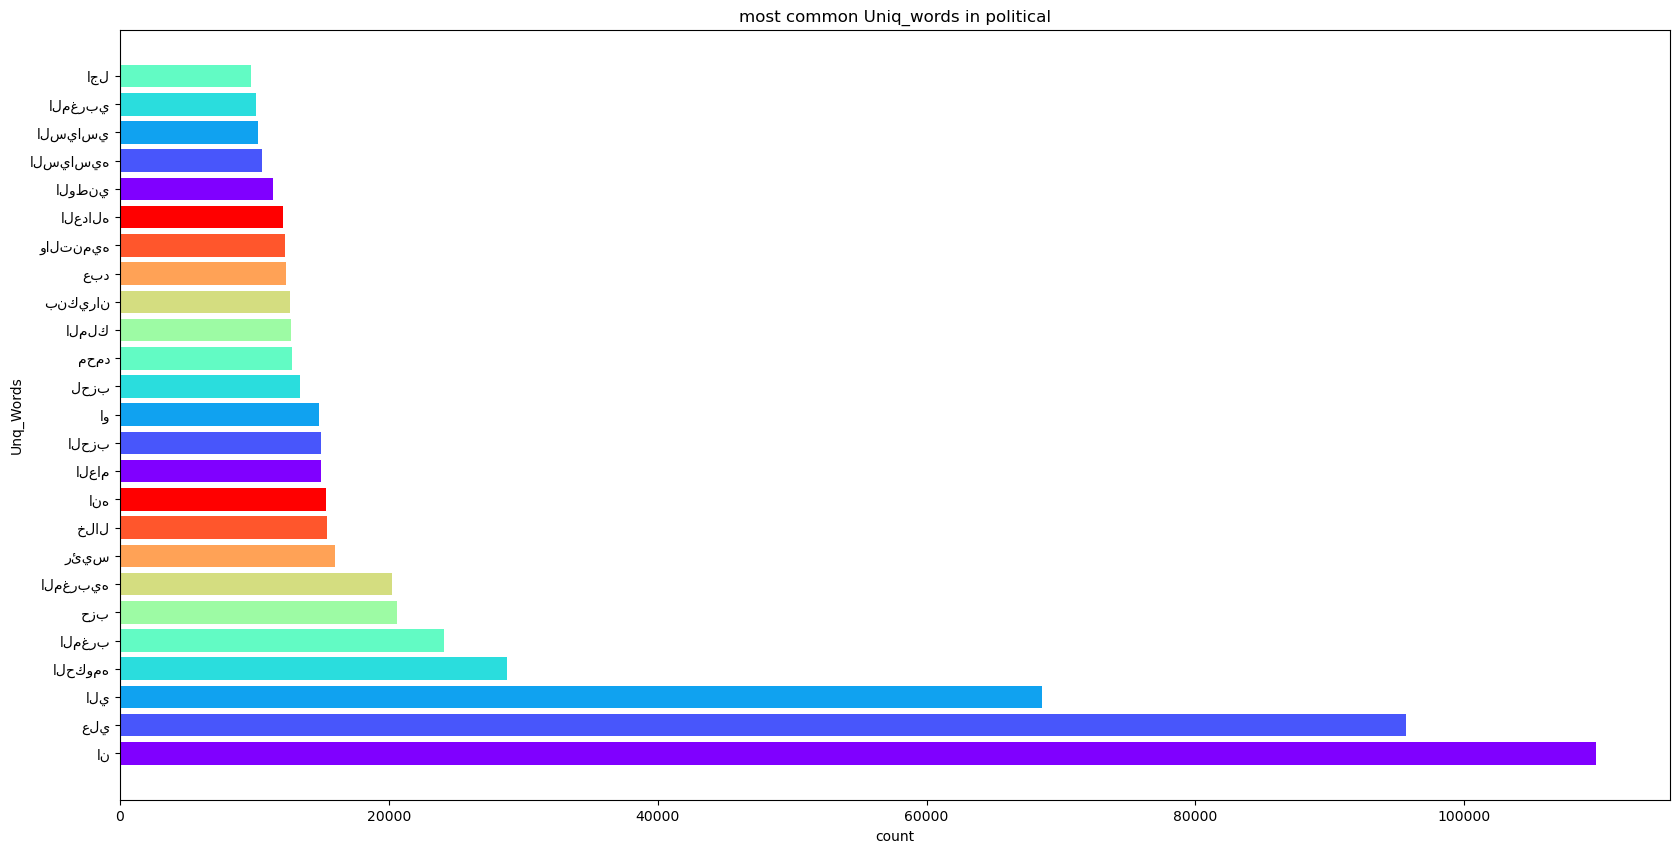

In [52]:
plot(political_words, "most common Uniq_words in political")

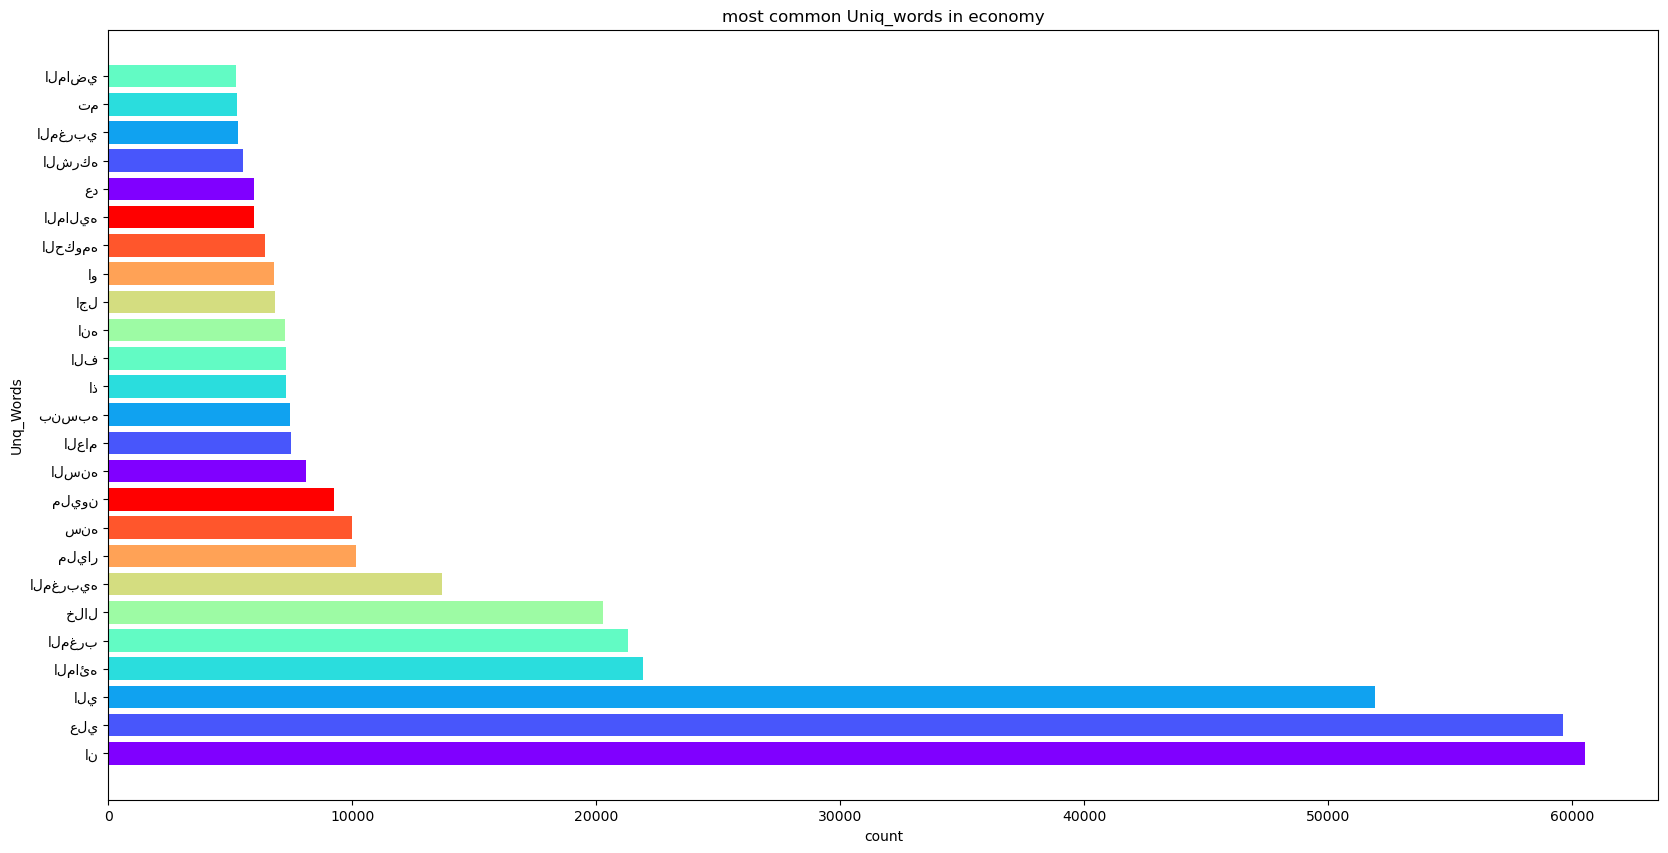

In [53]:
plot(economy_words, "most common Uniq_words in economy")

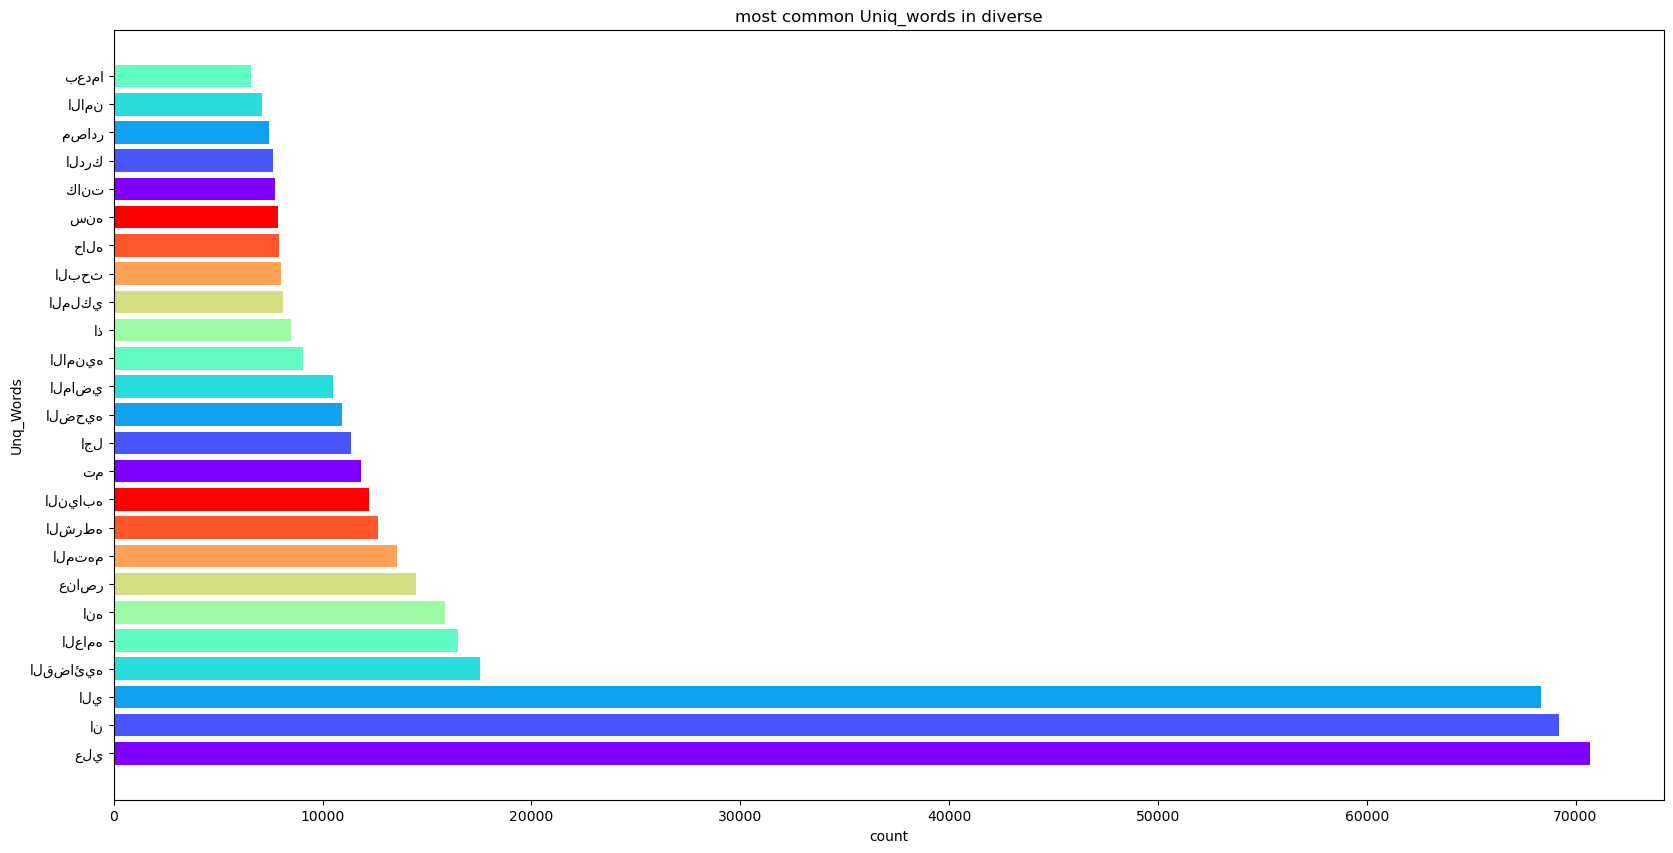

In [54]:
plot(diverse_words, "most common Uniq_words in diverse")

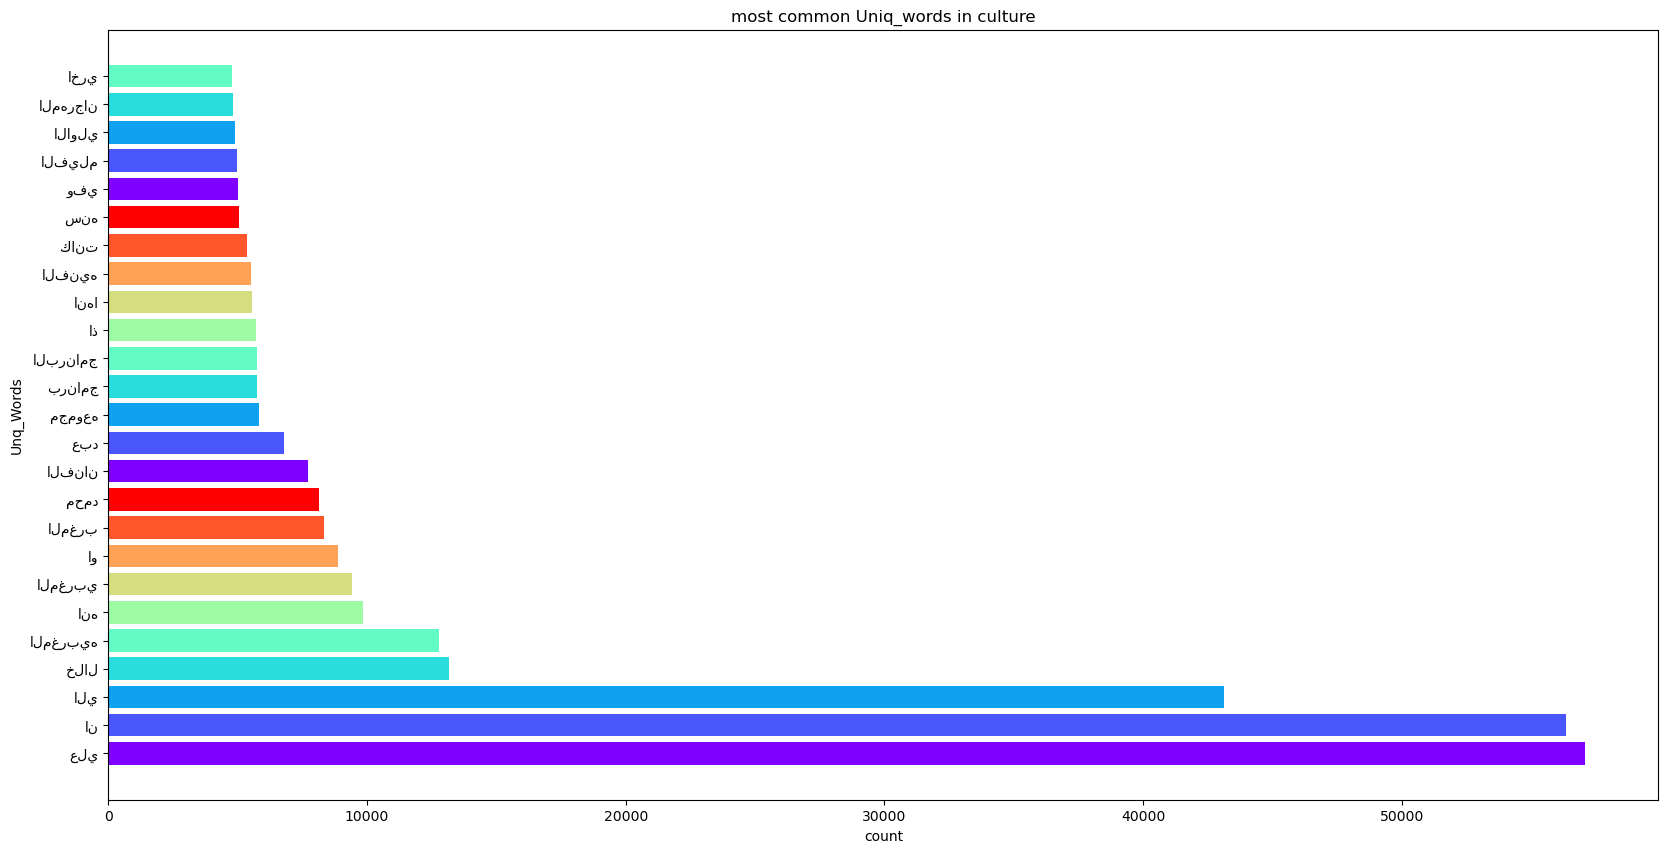

In [55]:
plot(culture_words, "most common Uniq_words in culture")

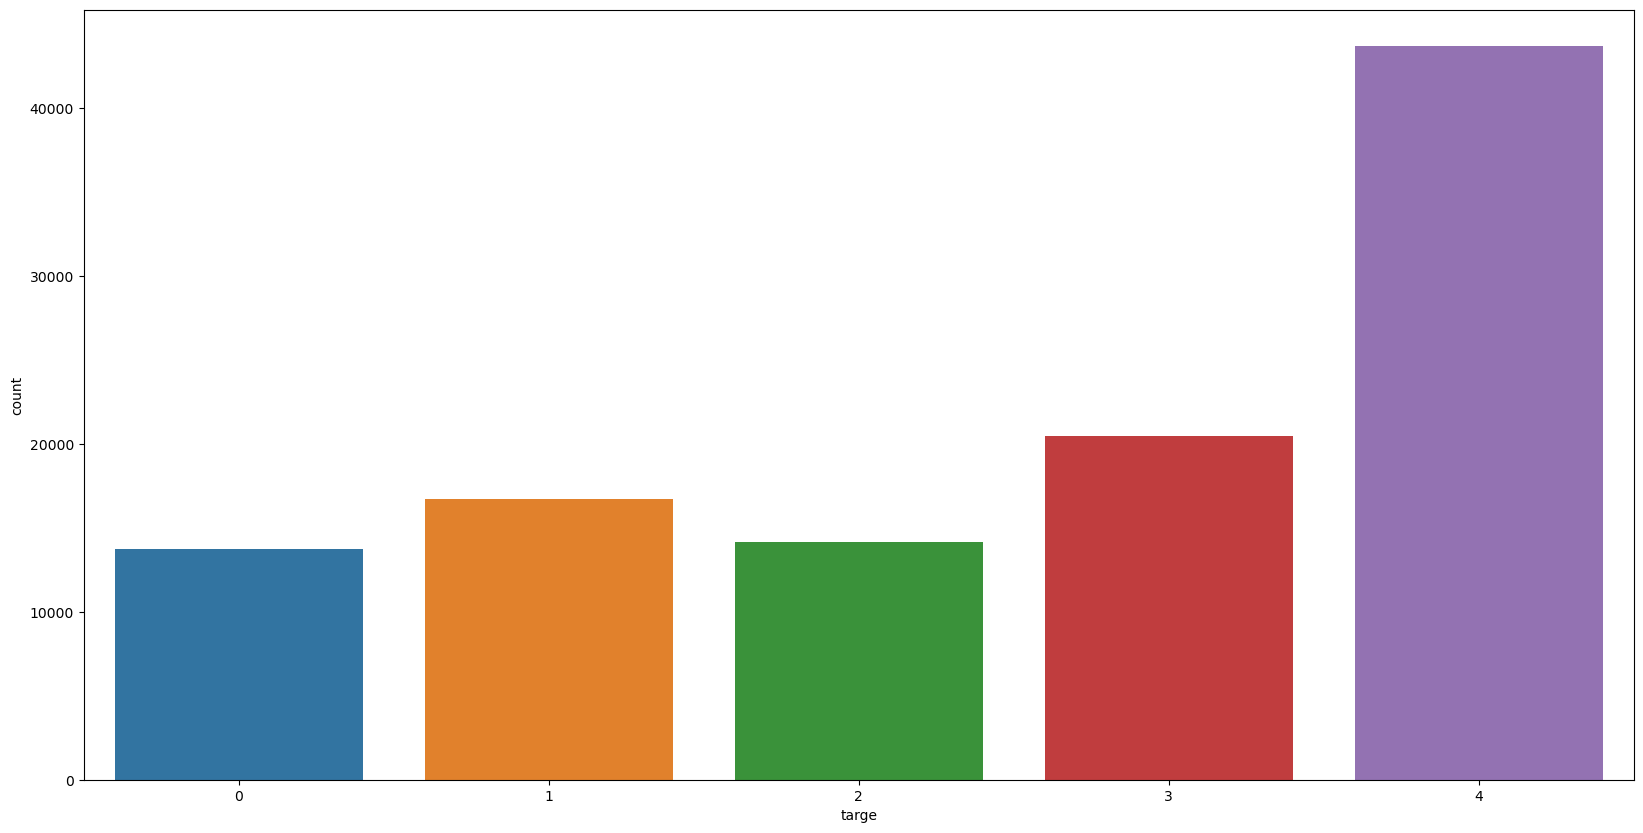

In [56]:
sns.countplot(data=clean_df, x="targe")
plt.show()

# Machine Learning Model

In [57]:
x = clean_df['text']
y = clean_df['targe']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [61]:
X_test

107160    [صحابي, هزمنا, الفريق, الوحيد, فاز, علي, الودا...
75095     [عبر, الاعب, الدولي, المغربي, المهدي, بنعطيه, ...
10961     [مؤسه, الرياض, تحتفي, برفيق, الجابري, مؤسي, ال...
93083     [قالت, الصحافه, المصريه, ان, مسؤولين, الكونفدر...
55266     [لجات, مجموعه, الاحزاب, السياسيه, الي, حرب, ال...
                                ...                        
33899     [قدمت, الحكومه, علي, انظار, لجنه, مراقبه, الما...
13586     [مخرجه, الطاهري, قالت, ان, السلسله, ملحمه, حدي...
53761     [لخص, الامين, العام, لحزب, الاستقلال, حميد, ال...
28065     [استقبل, مستشفي, الرازي, الامراض, العقليه, بتط...
80527     [تاهل, المنتخب, المغربي, لكره, اليد, اقل, سنه,...
Name: text, Length: 27198, dtype: object

In [62]:
y_test

107160    4
75095     4
10961     0
93083     4
55266     3
         ..
33899     2
13586     0
53761     3
28065     1
80527     4
Name: targe, Length: 27198, dtype: int64

In [63]:
word_vectorizer = TfidfVectorizer(sublinear_tf = True, strip_accents = 'unicode', analyzer = 'word', ngram_range=(1,1), max_features=10000)

In [65]:
model = Pipeline([("tfidf",word_vectorizer),("clf",SVC())])

In [66]:
model = model.fit(X_train.astype('str'),y_train)

In [67]:
dump(model,"svc_model.joblib")

['svc_model.joblib']

In [69]:
model = load("svc_model.joblib")

# Model Evaluation

In [70]:
y_pred = model.predict(X_test.astype('str'))

In [73]:
model_accuracy = accuracy_score(y_test,y_pred)

In [74]:
print(model_accuracy)

0.9591514081917788
